In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gc

%matplotlib inline

# hour interval

In [2]:
march = pd.read_hdf('march.h5', 'df')

In [3]:
march.head(3)

,file_id,customer_id,timestamp,product_id,tm_mon,tm_day,tm_hour,tm_min,tm_sec,tm_wday,day_num
0,dfccd8e23f0b03ec4db7a9a745ad7399,64573086fcfee53e8fa6d8f1f44101bb,1488326402,c105a0,3,1,0,0,2,2,1
1,29962f9102502ee76bb3cddb8cf8c9ad,597df153a25e8e548cbe35f6e4da9cbb,1488326403,c105a0,3,1,0,0,3,2,1
2,fa3fa642378b9d98c0e2770611b92eb3,1db24b8cc0a7ce59634629e7f292520f,1488326405,c105a0,3,1,0,0,5,2,1


In [4]:
df = march.groupby(['file_id','tm_hour']).count().reset_index()[['file_id','tm_hour','timestamp']]

In [5]:
df.head(3)

,file_id,tm_hour,timestamp
0,0000e2398b12121a85166fed5fe2a3da,6,5
1,0000e2398b12121a85166fed5fe2a3da,8,38
2,0000e2398b12121a85166fed5fe2a3da,9,2


In [6]:
# 把小時切成 0~6, 6~12, 12~18, 18~24
#  21~ 23 + 0~3 , 3~9, 9~15, 15~21
time_interval_dict = dict()
for i in range(24):
    #j = i//6 
    j=(i-3)//6
    if j<0:
        j=3
    time_interval_dict[i]=j

In [7]:
march['time_cat'] = march['tm_hour'].map(time_interval_dict)

In [8]:
march = march.groupby(['file_id','time_cat']).count().reset_index()[['file_id','time_cat','timestamp']]
march['time_cat'] = march['time_cat']+1
march.head(3)

,file_id,time_cat,timestamp
0,0000e2398b12121a85166fed5fe2a3da,1,43
1,0000e2398b12121a85166fed5fe2a3da,2,4
2,0001fe8dce14ce099aa6ca8ea5026ea7,1,53


In [9]:
april = pd.read_hdf('april.h5', 'df')
april['time_cat'] = april['tm_hour'].map(time_interval_dict)
april = april.groupby(['file_id','time_cat']).count().reset_index()[['file_id','time_cat','timestamp']]
april['time_cat'] = april['time_cat']+1
april.head(3)

,file_id,time_cat,timestamp
0,00027f50019000accc492e5684efc818,2,74
1,00027f50019000accc492e5684efc818,3,273
2,00027f50019000accc492e5684efc818,4,31


In [10]:
may = pd.read_hdf('may.h5', 'df')
may['time_cat'] = may['tm_hour'].map(time_interval_dict)
may = may.groupby(['file_id','time_cat']).count().reset_index()[['file_id','time_cat','timestamp']]
may['time_cat'] = may['time_cat']+1
may.head(3)

,file_id,time_cat,timestamp
0,00008c73ee43c15b16c26b26398c1577,1,74
1,00008c73ee43c15b16c26b26398c1577,2,49
2,00008c73ee43c15b16c26b26398c1577,3,11


In [11]:
data = pd.concat([march,april,may],axis=0)
data.head(3)

,file_id,time_cat,timestamp
0,0000e2398b12121a85166fed5fe2a3da,1,43
1,0000e2398b12121a85166fed5fe2a3da,2,4
2,0001fe8dce14ce099aa6ca8ea5026ea7,1,53


In [12]:
data = data.groupby(['file_id','time_cat']).sum().reset_index()
data.head(3)

,file_id,time_cat,timestamp
0,00008c73ee43c15b16c26b26398c1577,1,74
1,00008c73ee43c15b16c26b26398c1577,2,49
2,00008c73ee43c15b16c26b26398c1577,3,11


In [13]:
data = data.pivot_table(values='timestamp',index=['file_id'],columns='time_cat',aggfunc='sum').reset_index()
data = data.fillna(0)
data.columns = ['file_id', 'hour_int1', 'hour_int2', 'hour_int3', 'hour_int4']
data.head(3)

,file_id,hour_int1,hour_int2,hour_int3,hour_int4
0,00008c73ee43c15b16c26b26398c1577,74.0,49.0,11.0,0.0
1,0000e2398b12121a85166fed5fe2a3da,43.0,4.0,0.0,0.0
2,0001fe8dce14ce099aa6ca8ea5026ea7,53.0,80.0,23.0,78.0


In [14]:
data.to_csv('hour_int.csv',index=False)

# minute interval

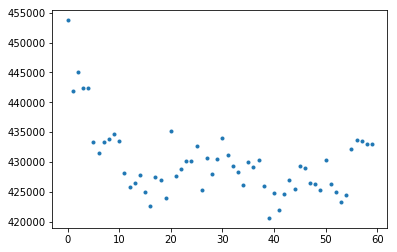

In [15]:
march = pd.read_hdf('march.h5', 'df')
df = march.groupby(['file_id','tm_min']).count().reset_index()[['file_id','tm_min','timestamp']]
plt.plot(df.groupby('tm_min').sum().reset_index().timestamp,'.')

In [16]:
# 把分鐘切成 0~15, 15~30, 30~45, 45~60
time_interval_dict = dict()
for i in range(60):
    #j = i//6 
    j=(i)//15
    time_interval_dict[i]=j

In [17]:
march['min_cat'] = march['tm_min'].map(time_interval_dict)
march = march.groupby(['file_id','min_cat']).count().reset_index()[['file_id','min_cat','timestamp']]
march['min_cat'] = march['min_cat']+1
march.head(3)

,file_id,min_cat,timestamp
0,0000e2398b12121a85166fed5fe2a3da,1,42
1,0000e2398b12121a85166fed5fe2a3da,2,2
2,0000e2398b12121a85166fed5fe2a3da,3,1


In [18]:
april = pd.read_hdf('april.h5', 'df')
april['min_cat'] = april['tm_min'].map(time_interval_dict)
april = april.groupby(['file_id','min_cat']).count().reset_index()[['file_id','min_cat','timestamp']]
april['min_cat'] = april['min_cat']+1
april.head(3)

,file_id,min_cat,timestamp
0,00027f50019000accc492e5684efc818,1,139
1,00027f50019000accc492e5684efc818,2,72
2,00027f50019000accc492e5684efc818,3,84


In [19]:
may = pd.read_hdf('may.h5', 'df')
may['min_cat'] = may['tm_min'].map(time_interval_dict)
may = may.groupby(['file_id','min_cat']).count().reset_index()[['file_id','min_cat','timestamp']]
may['min_cat'] = may['min_cat']+1
may.head(3)

,file_id,min_cat,timestamp
0,00008c73ee43c15b16c26b26398c1577,1,34
1,00008c73ee43c15b16c26b26398c1577,2,36
2,00008c73ee43c15b16c26b26398c1577,3,30


In [20]:
data = pd.concat([march,april,may],axis=0)
data = data.groupby(['file_id','min_cat']).sum().reset_index()
data.head(3)

,file_id,min_cat,timestamp
0,00008c73ee43c15b16c26b26398c1577,1,34
1,00008c73ee43c15b16c26b26398c1577,2,36
2,00008c73ee43c15b16c26b26398c1577,3,30


In [21]:
data = data.pivot_table(values='timestamp',index=['file_id'],columns='min_cat',aggfunc='sum').reset_index()
data = data.fillna(0)
data.columns = ['file_id', 'min_interval1', 'min_interval2', 'min_interval3', 'min_interval4']
data.head(3)

,file_id,min_interval1,min_interval2,min_interval3,min_interval4
0,00008c73ee43c15b16c26b26398c1577,34.0,36.0,30.0,34.0
1,0000e2398b12121a85166fed5fe2a3da,42.0,2.0,1.0,2.0
2,0001fe8dce14ce099aa6ca8ea5026ea7,48.0,52.0,72.0,62.0


In [22]:
data.to_csv('min_interval_cnt.csv',index=False)

# sec_interval

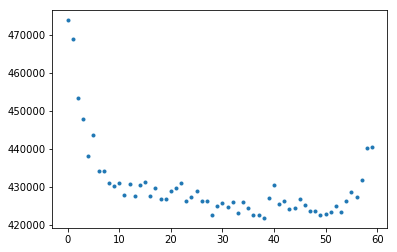

In [23]:
march = pd.read_hdf('march.h5', 'df')
df = march.groupby(['file_id','tm_sec']).count().reset_index()[['file_id','tm_sec','timestamp']]
plt.plot(df.groupby('tm_sec').sum().reset_index().timestamp,'.')

In [24]:
# 把分鐘切成 0~15, 15~30, 30~45, 45~60
time_interval_dict = dict()
for i in range(60):
    #j = i//6 
    j=(i)//15
    time_interval_dict[i]=j

In [25]:
march['sec_cat'] = march['tm_sec'].map(time_interval_dict)
march = march.groupby(['file_id','sec_cat']).count().reset_index()[['file_id','sec_cat','timestamp']]
march['sec_cat'] = march['sec_cat']+1
march.head(3)

,file_id,sec_cat,timestamp
0,0000e2398b12121a85166fed5fe2a3da,1,10
1,0000e2398b12121a85166fed5fe2a3da,2,9
2,0000e2398b12121a85166fed5fe2a3da,3,15


In [26]:
april = pd.read_hdf('april.h5', 'df')
april['sec_cat'] = april['tm_sec'].map(time_interval_dict)
april = april.groupby(['file_id','sec_cat']).count().reset_index()[['file_id','sec_cat','timestamp']]
april['sec_cat'] = april['sec_cat']+1
april.head(3)

,file_id,sec_cat,timestamp
0,00027f50019000accc492e5684efc818,1,107
1,00027f50019000accc492e5684efc818,2,91
2,00027f50019000accc492e5684efc818,3,98


In [27]:
may = pd.read_hdf('may.h5', 'df')
may['sec_cat'] = may['tm_sec'].map(time_interval_dict)
may = may.groupby(['file_id','sec_cat']).count().reset_index()[['file_id','sec_cat','timestamp']]
may['sec_cat'] = may['sec_cat']+1
may.head(3)

,file_id,sec_cat,timestamp
0,00008c73ee43c15b16c26b26398c1577,1,29
1,00008c73ee43c15b16c26b26398c1577,2,35
2,00008c73ee43c15b16c26b26398c1577,3,31


In [28]:
data = pd.concat([march,april,may],axis=0)
data = data.groupby(['file_id','sec_cat']).sum().reset_index()
data.head(3)

,file_id,sec_cat,timestamp
0,00008c73ee43c15b16c26b26398c1577,1,29
1,00008c73ee43c15b16c26b26398c1577,2,35
2,00008c73ee43c15b16c26b26398c1577,3,31


In [29]:
data = data.pivot_table(values='timestamp',index=['file_id'],columns='sec_cat',aggfunc='sum').reset_index()
data = data.fillna(0)
data.columns = ['file_id', 'sec_interval1', 'sec_interval2', 'sec_interval3', 'sec_interval4']
data.head(3)

,file_id,sec_interval1,sec_interval2,sec_interval3,sec_interval4
0,00008c73ee43c15b16c26b26398c1577,29.0,35.0,31.0,39.0
1,0000e2398b12121a85166fed5fe2a3da,10.0,9.0,15.0,13.0
2,0001fe8dce14ce099aa6ca8ea5026ea7,61.0,49.0,53.0,71.0


In [30]:
data.to_csv('sec_interval_cnt.csv',index=False)